In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print("seed",seed)

In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(10962.1631)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

dec: h_dim 64


In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 20920.99403  validloss 1140951.52238±0.00000  bestvalidloss 1140951.52238  last_update 0
train: iter 1  trainloss 2552.76593  validloss 50381.58835±0.00000  bestvalidloss 50381.58835  last_update 0
train: iter 2  trainloss 1134.61370  validloss 6784.05489±0.00000  bestvalidloss 6784.05489  last_update 0
train: iter 3  trainloss 947.76243  validloss 2629.29753±0.00000  bestvalidloss 2629.29753  last_update 0
train: iter 4  trainloss 896.56624  validloss 1633.27301±0.00000  bestvalidloss 1633.27301  last_update 0
train: iter 5  trainloss 842.98642  validloss 1749.65312±0.00000  bestvalidloss 1633.27301  last_update 1
train: iter 6  trainloss 749.24182  validloss 1290.32150±0.00000  bestvalidloss 1290.32150  last_update 0
train: iter 7  trainloss 710.29848  validloss 1398.07934±0.00000  bestvalidloss 1290.32150  last_update 1
train: iter 8  trainloss 792.40910  validloss 1478.71331±0.00000  bestvalidloss 1290.32150  last_update 2
train: iter 9  

train: iter 78  trainloss -541.17441  validloss 770.81138±0.00000  bestvalidloss -290.46818  last_update 1
train: iter 79  trainloss -568.62484  validloss -216.49109±0.00000  bestvalidloss -290.46818  last_update 2
train: iter 80  trainloss -608.42260  validloss -176.38120±0.00000  bestvalidloss -290.46818  last_update 3
train: iter 81  trainloss -549.44566  validloss -101.78729±0.00000  bestvalidloss -290.46818  last_update 4
train: iter 82  trainloss -626.69697  validloss -272.91722±0.00000  bestvalidloss -290.46818  last_update 5
train: iter 83  trainloss -646.17617  validloss -314.20075±0.00000  bestvalidloss -314.20075  last_update 0
train: iter 84  trainloss -592.34353  validloss -215.71769±0.00000  bestvalidloss -314.20075  last_update 1
train: iter 85  trainloss -499.74436  validloss -240.10994±0.00000  bestvalidloss -314.20075  last_update 2
train: iter 86  trainloss -574.83226  validloss -342.32661±0.00000  bestvalidloss -342.32661  last_update 0
train: iter 87  trainloss -67

train: iter 154  trainloss -908.97945  validloss -685.73828±0.00000  bestvalidloss -902.27105  last_update 7
train: iter 155  trainloss -810.36590  validloss -652.18297±0.00000  bestvalidloss -902.27105  last_update 8
train: iter 156  trainloss -746.99555  validloss -820.04938±0.00000  bestvalidloss -902.27105  last_update 9
train: iter 157  trainloss -887.56834  validloss -275.36502±0.00000  bestvalidloss -902.27105  last_update 10
train: iter 158  trainloss -901.67549  validloss -843.62966±0.00000  bestvalidloss -902.27105  last_update 11
train: iter 159  trainloss -974.84525  validloss -760.37063±0.00000  bestvalidloss -902.27105  last_update 12
train: iter 160  trainloss -901.85720  validloss -677.60833±0.00000  bestvalidloss -902.27105  last_update 13
train: iter 161  trainloss -749.93221  validloss -736.27115±0.00000  bestvalidloss -902.27105  last_update 14
train: iter 162  trainloss -806.78932  validloss -556.60537±0.00000  bestvalidloss -902.27105  last_update 15
train: iter 1

train: iter 228  trainloss -1091.36606  validloss -991.59268±0.00000  bestvalidloss -1127.50311  last_update 17
train: iter 229  trainloss -740.17296  validloss -1081.02162±0.00000  bestvalidloss -1127.50311  last_update 18
train: iter 230  trainloss -1004.99409  validloss -634.93265±0.00000  bestvalidloss -1127.50311  last_update 19
train: iter 231  trainloss -1151.30928  validloss -1084.11474±0.00000  bestvalidloss -1127.50311  last_update 20
train: iter 232  trainloss -1051.12450  validloss -917.79513±0.00000  bestvalidloss -1127.50311  last_update 21
train: iter 233  trainloss -1191.26550  validloss -869.42864±0.00000  bestvalidloss -1127.50311  last_update 22
train: iter 234  trainloss -1174.15236  validloss -966.05131±0.00000  bestvalidloss -1127.50311  last_update 23
train: iter 235  trainloss -991.88390  validloss -1126.89884±0.00000  bestvalidloss -1127.50311  last_update 24
train: iter 236  trainloss -1073.66301  validloss -937.12241±0.00000  bestvalidloss -1127.50311  last_u

train: iter 302  trainloss -1167.83391  validloss -1061.29291±0.00000  bestvalidloss -1289.10168  last_update 1
train: iter 303  trainloss -1281.45825  validloss -457.82002±0.00000  bestvalidloss -1289.10168  last_update 2
train: iter 304  trainloss -1173.88302  validloss -1056.33468±0.00000  bestvalidloss -1289.10168  last_update 3
train: iter 305  trainloss -1226.46376  validloss -1071.72164±0.00000  bestvalidloss -1289.10168  last_update 4
train: iter 306  trainloss -1306.62477  validloss -1188.57374±0.00000  bestvalidloss -1289.10168  last_update 5
train: iter 307  trainloss -1206.41203  validloss -1184.83426±0.00000  bestvalidloss -1289.10168  last_update 6
train: iter 308  trainloss -1295.53308  validloss -1179.28001±0.00000  bestvalidloss -1289.10168  last_update 7
train: iter 309  trainloss -1345.50529  validloss -1269.81459±0.00000  bestvalidloss -1289.10168  last_update 8
train: iter 310  trainloss -1276.04585  validloss -1175.76660±0.00000  bestvalidloss -1289.10168  last_up

train: iter 375  trainloss -1476.74403  validloss -1331.28219±0.00000  bestvalidloss -1360.64757  last_update 16
train: iter 376  trainloss -1331.72789  validloss -1331.49122±0.00000  bestvalidloss -1360.64757  last_update 17
train: iter 377  trainloss -1311.02685  validloss -1141.37528±0.00000  bestvalidloss -1360.64757  last_update 18
train: iter 378  trainloss -1279.14846  validloss -1214.10603±0.00000  bestvalidloss -1360.64757  last_update 19
train: iter 379  trainloss -1311.35439  validloss -1198.90065±0.00000  bestvalidloss -1360.64757  last_update 20
train: iter 380  trainloss -1421.58094  validloss -1317.40782±0.00000  bestvalidloss -1360.64757  last_update 21
train: iter 381  trainloss -1353.33704  validloss -1291.47634±0.00000  bestvalidloss -1360.64757  last_update 22
train: iter 382  trainloss -1284.81516  validloss -1265.55796±0.00000  bestvalidloss -1360.64757  last_update 23
train: iter 383  trainloss -1433.16067  validloss -1220.44355±0.00000  bestvalidloss -1360.64757

train: iter 449  trainloss -1200.80308  validloss -1031.51739±0.00000  bestvalidloss -1412.49954  last_update 5
train: iter 450  trainloss -1299.91036  validloss -1221.49391±0.00000  bestvalidloss -1412.49954  last_update 6
train: iter 451  trainloss -1450.37761  validloss -1274.33103±0.00000  bestvalidloss -1412.49954  last_update 7
train: iter 452  trainloss -1459.17857  validloss -1383.90751±0.00000  bestvalidloss -1412.49954  last_update 8
train: iter 453  trainloss -1452.19780  validloss -1308.22242±0.00000  bestvalidloss -1412.49954  last_update 9
train: iter 454  trainloss -1372.77608  validloss -1238.35479±0.00000  bestvalidloss -1412.49954  last_update 10
train: iter 455  trainloss -1471.86784  validloss -1148.27476±0.00000  bestvalidloss -1412.49954  last_update 11
train: iter 456  trainloss -1345.97966  validloss -1321.28352±0.00000  bestvalidloss -1412.49954  last_update 12
train: iter 457  trainloss -1316.35915  validloss -1022.62296±0.00000  bestvalidloss -1412.49954  las

train: iter 523  trainloss -1342.91533  validloss -1340.69877±0.00000  bestvalidloss -1475.18678  last_update 8
train: iter 524  trainloss -1448.91053  validloss -1415.19507±0.00000  bestvalidloss -1475.18678  last_update 9
train: iter 525  trainloss -1444.16728  validloss -970.79517±0.00000  bestvalidloss -1475.18678  last_update 10
train: iter 526  trainloss -1552.84461  validloss -1458.38947±0.00000  bestvalidloss -1475.18678  last_update 11
train: iter 527  trainloss -1447.71923  validloss -1477.43760±0.00000  bestvalidloss -1477.43760  last_update 0
train: iter 528  trainloss -1365.40670  validloss -1412.02271±0.00000  bestvalidloss -1477.43760  last_update 1
train: iter 529  trainloss -1528.72078  validloss -1344.66738±0.00000  bestvalidloss -1477.43760  last_update 2
train: iter 530  trainloss -1467.53090  validloss -1288.41394±0.00000  bestvalidloss -1477.43760  last_update 3
train: iter 531  trainloss -1542.82001  validloss -1441.52522±0.00000  bestvalidloss -1477.43760  last_

train: iter 596  trainloss -1521.49338  validloss -1406.37862±0.00000  bestvalidloss -1520.51005  last_update 14
train: iter 597  trainloss -1475.20960  validloss -1439.61123±0.00000  bestvalidloss -1520.51005  last_update 15
train: iter 598  trainloss -1580.70636  validloss -1498.58655±0.00000  bestvalidloss -1520.51005  last_update 16
train: iter 599  trainloss -1400.08892  validloss -1400.58143±0.00000  bestvalidloss -1520.51005  last_update 17
train: iter 600  trainloss -1448.74846  validloss -1306.10825±0.00000  bestvalidloss -1520.51005  last_update 18
train: iter 601  trainloss -1481.08029  validloss -1302.38144±0.00000  bestvalidloss -1520.51005  last_update 19
train: iter 602  trainloss -1515.94660  validloss -1320.04750±0.00000  bestvalidloss -1520.51005  last_update 20
train: iter 603  trainloss -1580.37499  validloss -1441.71689±0.00000  bestvalidloss -1520.51005  last_update 21
train: iter 604  trainloss -1437.00631  validloss -1419.19897±0.00000  bestvalidloss -1520.51005

train: iter 669  trainloss -1463.78058  validloss -908.38473±0.00000  bestvalidloss -1540.04841  last_update 2
train: iter 670  trainloss -1468.54698  validloss -1354.62723±0.00000  bestvalidloss -1540.04841  last_update 3
train: iter 671  trainloss -1605.34858  validloss -1489.50717±0.00000  bestvalidloss -1540.04841  last_update 4
train: iter 672  trainloss -1604.26212  validloss -1528.87924±0.00000  bestvalidloss -1540.04841  last_update 5
train: iter 673  trainloss -1567.43935  validloss -1512.33241±0.00000  bestvalidloss -1540.04841  last_update 6
train: iter 674  trainloss -1484.18387  validloss -1508.63079±0.00000  bestvalidloss -1540.04841  last_update 7
train: iter 675  trainloss -1552.56854  validloss -1059.84952±0.00000  bestvalidloss -1540.04841  last_update 8
train: iter 676  trainloss -1578.08506  validloss -1521.28814±0.00000  bestvalidloss -1540.04841  last_update 9
train: iter 677  trainloss -1482.00988  validloss -1475.17916±0.00000  bestvalidloss -1540.04841  last_up

train: iter 742  trainloss -1465.30500  validloss -1467.65440±0.00000  bestvalidloss -1571.74067  last_update 8
train: iter 743  trainloss -1596.72085  validloss -1313.37358±0.00000  bestvalidloss -1571.74067  last_update 9
train: iter 744  trainloss -1633.67046  validloss -1568.38096±0.00000  bestvalidloss -1571.74067  last_update 10
train: iter 745  trainloss -1573.53338  validloss -1436.25709±0.00000  bestvalidloss -1571.74067  last_update 11
train: iter 746  trainloss -1531.14834  validloss -1443.63170±0.00000  bestvalidloss -1571.74067  last_update 12
train: iter 747  trainloss -1157.17204  validloss -734.06173±0.00000  bestvalidloss -1571.74067  last_update 13
train: iter 748  trainloss -1467.18626  validloss -1187.95956±0.00000  bestvalidloss -1571.74067  last_update 14
train: iter 749  trainloss -1523.37618  validloss -1382.25173±0.00000  bestvalidloss -1571.74067  last_update 15
train: iter 750  trainloss -1597.24852  validloss -1419.27157±0.00000  bestvalidloss -1571.74067  l

train: iter 815  trainloss -1609.56259  validloss -1470.07310±0.00000  bestvalidloss -1597.83619  last_update 17
train: iter 816  trainloss -1606.03743  validloss -1538.21648±0.00000  bestvalidloss -1597.83619  last_update 18
train: iter 817  trainloss -1536.27304  validloss -1429.89264±0.00000  bestvalidloss -1597.83619  last_update 19
train: iter 818  trainloss -1627.77669  validloss -1450.86417±0.00000  bestvalidloss -1597.83619  last_update 20
train: iter 819  trainloss -1657.51322  validloss -1551.70655±0.00000  bestvalidloss -1597.83619  last_update 21
train: iter 820  trainloss -1674.40149  validloss -1557.82600±0.00000  bestvalidloss -1597.83619  last_update 22
train: iter 821  trainloss -1527.25594  validloss -1554.51194±0.00000  bestvalidloss -1597.83619  last_update 23
train: iter 822  trainloss -1517.85128  validloss -1220.23063±0.00000  bestvalidloss -1597.83619  last_update 24
train: iter 823  trainloss -1638.22470  validloss -1490.42378±0.00000  bestvalidloss -1597.83619

train: iter 889  trainloss -1607.34952  validloss -1499.40661±0.00000  bestvalidloss -1600.64031  last_update 42
train: iter 890  trainloss -1676.18766  validloss -1515.51402±0.00000  bestvalidloss -1600.64031  last_update 43
train: iter 891  trainloss -1537.10923  validloss -1392.90794±0.00000  bestvalidloss -1600.64031  last_update 44
train: iter 892  trainloss -1630.46935  validloss -1507.75667±0.00000  bestvalidloss -1600.64031  last_update 45
train: iter 893  trainloss -1642.37918  validloss -1538.80390±0.00000  bestvalidloss -1600.64031  last_update 46
train: iter 894  trainloss -1675.05644  validloss -1508.76505±0.00000  bestvalidloss -1600.64031  last_update 47
train: iter 895  trainloss -1678.15867  validloss -1599.18747±0.00000  bestvalidloss -1600.64031  last_update 48
train: iter 896  trainloss -1561.84812  validloss -1552.54015±0.00000  bestvalidloss -1600.64031  last_update 49
train: iter 897  trainloss -1557.72708  validloss -1349.60877±0.00000  bestvalidloss -1600.64031

train: iter 962  trainloss -1589.26547  validloss -1524.03141±0.00000  bestvalidloss -1607.15117  last_update 17
train: iter 963  trainloss -1401.60263  validloss -825.47581±0.00000  bestvalidloss -1607.15117  last_update 18
train: iter 964  trainloss -1649.78081  validloss -1484.17258±0.00000  bestvalidloss -1607.15117  last_update 19
train: iter 965  trainloss -1456.89028  validloss -1562.57992±0.00000  bestvalidloss -1607.15117  last_update 20
train: iter 966  trainloss -1612.84868  validloss -1263.41895±0.00000  bestvalidloss -1607.15117  last_update 21
train: iter 967  trainloss -1657.44645  validloss -1542.06103±0.00000  bestvalidloss -1607.15117  last_update 22
train: iter 968  trainloss -1683.41562  validloss -1550.03715±0.00000  bestvalidloss -1607.15117  last_update 23
train: iter 969  trainloss -1682.78482  validloss -1530.89238±0.00000  bestvalidloss -1607.15117  last_update 24
train: iter 970  trainloss -1663.80092  validloss -1501.18121±0.00000  bestvalidloss -1607.15117 

train: iter 1035  trainloss -1646.77834  validloss -1553.45377±0.00000  bestvalidloss -1607.15117  last_update 90
train: iter 1036  trainloss -1576.01763  validloss -1155.44619±0.00000  bestvalidloss -1607.15117  last_update 91
train: iter 1037  trainloss -1610.04392  validloss -1503.17660±0.00000  bestvalidloss -1607.15117  last_update 92
train: iter 1038  trainloss -1589.21689  validloss -1580.22473±0.00000  bestvalidloss -1607.15117  last_update 93
train: iter 1039  trainloss -1683.80989  validloss -1523.87525±0.00000  bestvalidloss -1607.15117  last_update 94
train: iter 1040  trainloss -1707.18829  validloss -1569.88811±0.00000  bestvalidloss -1607.15117  last_update 95
train: iter 1041  trainloss -1641.14280  validloss -1558.65208±0.00000  bestvalidloss -1607.15117  last_update 96
train: iter 1042  trainloss -1689.33472  validloss -1411.19779±0.00000  bestvalidloss -1607.15117  last_update 97
train: iter 1043  trainloss -1697.44818  validloss -1587.93568±0.00000  bestvalidloss -1

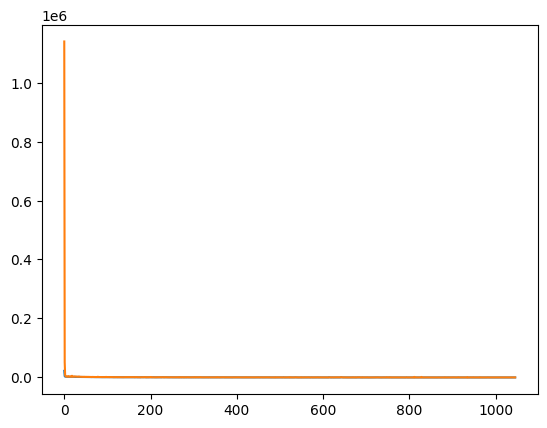

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
# plt.ylim([-2000, 1000])
plt.xlim([50, len(train_curve1)])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 4.16020  validloss 4.30763±0.00000  bestvalidloss 4.30763  last_update 0
train: iter 1  trainloss 3.87438  validloss 3.99484±0.00000  bestvalidloss 3.99484  last_update 0
train: iter 2  trainloss 3.64103  validloss 3.72676±0.00000  bestvalidloss 3.72676  last_update 0
train: iter 3  trainloss 3.45412  validloss 3.54625±0.00000  bestvalidloss 3.54625  last_update 0
train: iter 4  trainloss 3.29190  validloss 3.35045±0.00000  bestvalidloss 3.35045  last_update 0
train: iter 5  trainloss 3.13816  validloss 3.19628±0.00000  bestvalidloss 3.19628  last_update 0
train: iter 6  trainloss 3.00884  validloss 3.06836±0.00000  bestvalidloss 3.06836  last_update 0
train: iter 7  trainloss 2.88014  validloss 2.94116±0.00000  bestvalidloss 2.94116  last_update 0
train: iter 8  trainloss 2.75669  validloss 2.81035±0.00000  bestvalidloss 2.81035  last_update 0
train: iter 9  trainloss 2.63643  validloss 2.68751±0.00000  bestvalidloss 2.68751  last_update 0
train: iter 10  trai

train: iter 83  trainloss -0.36857  validloss -0.69390±0.00000  bestvalidloss -0.73185  last_update 1
train: iter 84  trainloss -0.38178  validloss -0.71724±0.00000  bestvalidloss -0.73185  last_update 2
train: iter 85  trainloss -0.38640  validloss -0.69764±0.00000  bestvalidloss -0.73185  last_update 3
train: iter 86  trainloss -0.34109  validloss -0.73558±0.00000  bestvalidloss -0.73558  last_update 0
train: iter 87  trainloss -0.37559  validloss -0.73713±0.00000  bestvalidloss -0.73713  last_update 0
train: iter 88  trainloss -0.39651  validloss -0.74367±0.00000  bestvalidloss -0.74367  last_update 0
train: iter 89  trainloss -0.38511  validloss -0.69808±0.00000  bestvalidloss -0.74367  last_update 1
train: iter 90  trainloss -0.38789  validloss -0.72572±0.00000  bestvalidloss -0.74367  last_update 2
train: iter 91  trainloss -0.39984  validloss -0.75747±0.00000  bestvalidloss -0.75747  last_update 0
train: iter 92  trainloss -0.39313  validloss -0.75569±0.00000  bestvalidloss -0.7

train: iter 168  trainloss -0.38919  validloss -0.71925±0.00000  bestvalidloss -0.80740  last_update 17
train: iter 169  trainloss -0.37600  validloss -0.74844±0.00000  bestvalidloss -0.80740  last_update 18
train: iter 170  trainloss -0.38112  validloss -0.73897±0.00000  bestvalidloss -0.80740  last_update 19
train: iter 171  trainloss -0.39687  validloss -0.76452±0.00000  bestvalidloss -0.80740  last_update 20
train: iter 172  trainloss -0.40360  validloss -0.71034±0.00000  bestvalidloss -0.80740  last_update 21
train: iter 173  trainloss -0.35725  validloss -0.73384±0.00000  bestvalidloss -0.80740  last_update 22
train: iter 174  trainloss -0.36428  validloss -0.72257±0.00000  bestvalidloss -0.80740  last_update 23
train: iter 175  trainloss -0.40547  validloss -0.72056±0.00000  bestvalidloss -0.80740  last_update 24
train: iter 176  trainloss -0.38797  validloss -0.71368±0.00000  bestvalidloss -0.80740  last_update 25
train: iter 177  trainloss -0.34975  validloss -0.72041±0.00000 

In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([ 1.1956, -1.8563, -3.1189, -3.3115], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 70.32105  validloss 70.16736±0.00000  bestvalidloss 70.16736  last_update 0
train: iter 1  trainloss 54.56973  validloss 57.70331±0.00000  bestvalidloss 57.70331  last_update 0
train: iter 2  trainloss 40.23480  validloss 42.66551±0.00000  bestvalidloss 42.66551  last_update 0
train: iter 3  trainloss 30.95478  validloss 31.95234±0.00000  bestvalidloss 31.95234  last_update 0
train: iter 4  trainloss 24.19101  validloss 25.07351±0.00000  bestvalidloss 25.07351  last_update 0
train: iter 5  trainloss 19.20722  validloss 19.49711±0.00000  bestvalidloss 19.49711  last_update 0
train: iter 6  trainloss 15.66250  validloss 16.07263±0.00000  bestvalidloss 16.07263  last_update 0
train: iter 7  trainloss 13.05418  validloss 13.51363±0.00000  bestvalidloss 13.51363  last_update 0
train: iter 8  trainloss 11.20066  validloss 11.72775±0.00000  bestvalidloss 11.72775  last_update 0
train: iter 9  trainloss 9.86880  validloss 10.42014±0.00000  bestvalidloss 10.42014  last_

train: iter 85  trainloss 3.18558  validloss 4.53590±0.00000  bestvalidloss 4.30188  last_update 43
train: iter 86  trainloss 3.14305  validloss 4.53365±0.00000  bestvalidloss 4.30188  last_update 44
train: iter 87  trainloss 3.21894  validloss 4.48859±0.00000  bestvalidloss 4.30188  last_update 45
train: iter 88  trainloss 3.18116  validloss 4.41216±0.00000  bestvalidloss 4.30188  last_update 46
train: iter 89  trainloss 3.12908  validloss 4.69785±0.00000  bestvalidloss 4.30188  last_update 47
train: iter 90  trainloss 3.16747  validloss 4.71356±0.00000  bestvalidloss 4.30188  last_update 48
train: iter 91  trainloss 3.11603  validloss 4.65563±0.00000  bestvalidloss 4.30188  last_update 49
train: iter 92  trainloss 3.18315  validloss 4.76369±0.00000  bestvalidloss 4.30188  last_update 50
train: iter 93  trainloss 3.12166  validloss 4.73484±0.00000  bestvalidloss 4.30188  last_update 51
train: iter 94  trainloss 3.17901  validloss 4.41170±0.00000  bestvalidloss 4.30188  last_update 52


In [12]:

vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_cartpole_unweighted
base load self.initial_belief.data.sum() tensor(-7.0911)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(1.9157)


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-1.0704959981900204
tensor([-0.2217])
